Importing Modules

In [15]:
import pandas as pd
import matplotlib as plt
import sklearn
import scipy
import numpy as np

Importing MNIST data file. It is a file that contains images of 1000s of samples of handwriting numbers. 

The dataset contains the following:
• A DESCR key describing the dataset
• A data key containing an array with one row per instance and one column per
feature
• A target key containing an array with the labels

In [3]:
# importing our dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

/Users/coymorris/miniconda3/envs/geoenv/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
# keys of interest are target and data
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Data exporation and train/test split

In [5]:
# investigating shape of data and target label
# there are 70000 images with 784 features each
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)


(70000, 784)
(70000,)


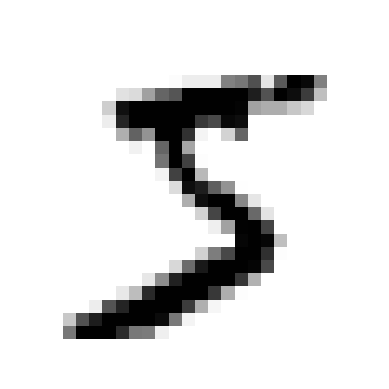

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[0].to_numpy()
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = 'binary')
plt.axis('off')
plt.show()

# the image printed is a 5, confirm
y[0]

# the label is a string. lets typecast to an integer; will be best for our model
y = y.astype(np.uint8)

In [17]:
# creating out train test split; luckily our data is already shuffled for us. don't need to stratify
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Training a binary classifier

In [ ]:
# let's train simple binary classifier, one that will detect between '5' and 'not 5'
# create target vectors
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# trying a stochastic gradient descent classifier
from sklearn.linear_model import SGDClassifier

# stochastic model--if we want reproducibility, use random_state
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

# detect images!
sgd_clf.predict([some_digit])

Let's evaluate the model!

In [21]:
# accuracy is not the preferred measure of testing model performance, so we will skip that. explanation in book, but just know we gotta use
# precision and recall (takes into account false positive rate and true positive rate)
# we need a set of predictions to be able to create a confusion matrix. DON'T USE TEST SET. we will use cross_val functionality
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

# create cm
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [25]:
# find f1 score using precision and recall calculations
# f1 score finds harmonic mean of both; mean of ratios
from sklearn.metrics import precision_score, recall_score

print('precision: ' + str(precision_score(y_train_5, y_train_pred)))
print('recall: ' + str(recall_score(y_train_5, y_train_pred)))

from sklearn.metrics import f1_score
print('f1 score: ' + str(f1_score(y_train_5, y_train_pred)))

precision: 0.8370879772350012
recall: 0.6511713705958311
f1 score: 0.7325171197343846


Let's consider how SGD makes its classifications.

